## Model Validation

### 1. Validation and overfitting

#### 1.1 Generate fake data points and split them into train/validation
How do we know a model we created would be any good if we applied it to data other than the data that the model was trained on?  

We are going to create some fake data, and use 80% of the data to build a model, and the other 20% to validate it.

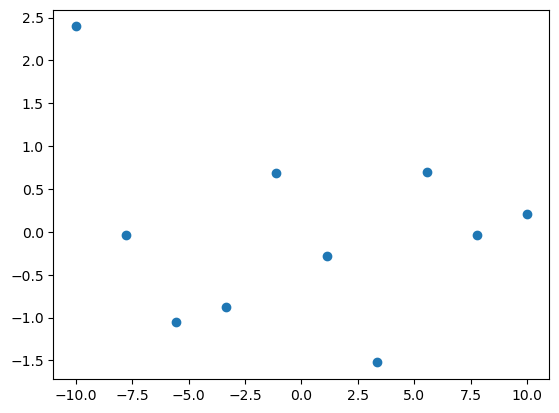

In [1]:
#Generate 10 fake data points 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_total = 10 #number of data points
n_for_valid = 2 #number of data points we will use from here as a validation set

#range of the x values
x_min = -10
x_max = 10
#generate 10 evenly distributed x values
x = np.linspace(-10,10,n_total)

np.random.seed(146)
#generate 10 y values using normal distribution
y = np.random.normal(size=n_total)

#make a scatterplot
plt.scatter(x,y)
plt.show()

In [2]:
#Build a dataframe using x and y

data = pd.DataFrame(columns=['x','y'])
data['x'] = x
data['y'] = y

data

,x,y
0,-10.000000,2.396479
1,-7.777778,-0.038103
2,-5.555556,-1.053523
3,-3.333333,-0.881304
4,-1.111111,0.688067
5,1.111111,-0.284121
6,3.333333,-1.524334
7,5.555556,0.696851
8,7.777778,-0.031495
9,10.000000,0.207307


In [3]:
#Generate indices for validation data
#np.random.seed(48)
idx_valid = np.random.choice(n_total, n_for_valid, replace=False)
idx_valid

array([1, 6])

In [4]:
#Get validation data

data_valid = data.iloc[idx_valid]
data_valid

,x,y
1,-7.777778,-0.038103
6,3.333333,-1.524334


In [5]:
#Get train data

data = data.drop(index=idx_valid)
data

,x,y
0,-10.000000,2.396479
2,-5.555556,-1.053523
3,-3.333333,-0.881304
4,-1.111111,0.688067
5,1.111111,-0.284121
7,5.555556,0.696851
8,7.777778,-0.031495
9,10.000000,0.207307


#### 1.2 Fit $y$ and $x$ with a polinomial model
Next, we use a polinomial relationship to model $y$ and $x$ as follows (called polinomial kernel). Note that it is still a linear regression because its linear w.r.t. the parameters $\beta_0$ to $\beta_p$! 

$$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \cdots + \beta_p x^p$$

So, even though there's a single variable, we're essentially creating more variables by considering higher powers of $x$.

In [6]:
#Transform x into polinomial features

from sklearn.preprocessing import PolynomialFeatures as PF
p = PF(degree=7)

X_poly = p.fit_transform(data['x'].values.reshape(-1,1))
X_poly

np.shape(X_poly)

(8, 8)

In [14]:
#X_poly

In [7]:
#Perform linear regression

from sklearn.linear_model import LinearRegression as LR
lin_reg = LR()
lin_reg.fit(X_poly, data['y'])
print(lin_reg.score(X_poly, data['y']))
print(lin_reg.coef_)
print(lin_reg.intercept_)

1.0
[ 0.00000000e+00 -5.14711391e-01 -1.87481603e-01  6.46847341e-02
  6.99711763e-03 -1.73998563e-03 -5.03439849e-05  1.13366357e-05]
0.42286164098726636


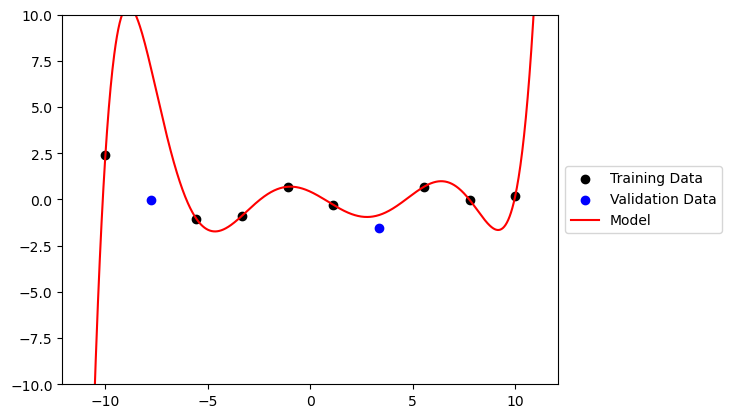

In [8]:
# Visualize overfitting

# The range of x values I want to plot
x_range = np.linspace(x_min*1.1, x_max*1.1, 1000)
# Compute the powers of x, to plug into the model
x_range_poly = p.fit_transform(x_range.reshape(-1,1))
# Compute the y values, for the x values above
y_pred = lin_reg.predict(x_range_poly)

#three plots: 1) Train data, 2) Validation data, 3) the model
plt.scatter(data['x'], data['y'], label='Training Data', color='k')
plt.scatter(data_valid['x'], data_valid['y'], label='Validation Data', color='blue')
plt.plot(x_range, y_pred, color='r', label='Model')
plt.legend(bbox_to_anchor=[1,0.5], loc='center left')
plt.ylim([-10,10])
plt.show()

#### 1.3 Validation

In [9]:
#Check predicted y values in validation set

X_valid_poly = p.fit_transform(data_valid['x'].values.reshape(-1,1))
y_valid_pred = lin_reg.predict(X_valid_poly)
y_valid_pred

array([ 7.11617033, -0.84966531])

The <b>validation</b> step!

In [10]:
lin_reg.score(X_valid_poly, data_valid['y'])

-45.75560981156517

Is that even possible???

So - we have an extremely negative $R^2$ score on the test data, even though we had a perfect score on the training data.

This is an example of a model that is _extremely_ **overfit**. (By the way - there is actually no pattern to be found in this data.  The $y$ values have nothing to do with the $x$ values).

An overfit model is typically characterized by performing extremely well on the data used to train it, while performing poorly on new data.  That is to say, the model has basically memorized the information it was given, but hasn't really discovered the underlying "pattern", so it's unable to generalize its knoweledge to new situations.

An overfit student would be one who memorizes all the material in a class, can repeat it verbatim and gets straight A's, but is unable to adapt their knowledge to new situations in life.

In more technical terms, we speak about the internal validity and external validity of a model:
- **Internal validity** refers to how accurate a model's predictions are on the data it was trained on
- **External validity** refers to accurate a model's predictions are on data it was not trained on, i.e., how well it generalizes to new data.
- An **overfit** model will tend to have a much lower external vs internal validity.
- An **underfit** model will tend to have both types of validity being rather low.

Since new data is, by definition, data we do not have yet, the best we can do is to pretend that some of our data is not available yet, and then go through a process like we did above.  The goal is to develop an expectation for how well our model _might_ generalize to new data.  This will help you from deploying some code or spending a whole lot of time on a model that was doomed to fail from the get-go!

### 2. The effect of different train/validation splits

In [17]:
concrete = pd.read_excel('./data/Concrete_Data.xls')
concrete.tail()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


In [12]:
#Simplify column names

concrete.columns = [item.split('(')[0].rstrip().replace(' ','_') for item in concrete.columns]
concrete.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [13]:
# Get X and y

X = np.array(concrete.drop(columns = 'Concrete_compressive_strength'))
y = concrete['Concrete_compressive_strength'].values

In [14]:
# Do a train/test split using sklearn, tts is very important! 

from sklearn.model_selection import train_test_split as tts
Xtrain,Xvalid,ytrain,yvalid = tts(X,y, test_size=0.4, shuffle=True, random_state = 1)
lin_reg.fit(Xtrain,ytrain)

print('Internal validity (R^2) :', format(lin_reg.score(Xtrain,ytrain), '.2f'))
print('External validity (R^2) :', format(lin_reg.score(Xvalid,yvalid), '.2f'))

Internal validity (R^2) : 0.66
External validity (R^2) : 0.53


In [15]:
# Do another train/test split with a different random_state

Xtrain,Xvalid,ytrain,yvalid = tts(X,y, test_size=0.4, shuffle=True, random_state = 146)
lin_reg.fit(Xtrain,ytrain)

print('Internal validity (R^2) :', format(lin_reg.score(Xtrain,ytrain), '.2f'))
print('External validity (R^2) :', format(lin_reg.score(Xvalid,yvalid), '.2f'))

Internal validity (R^2) : 0.62
External validity (R^2) : 0.60


### 3. k-fold cross validation

What if you just happened to pick a particular random_state which gave us unusually high or low results, and only did this validation once?  Do you think we could be misled about how good or bad our model is?  Like, what if you flipped a coin 10 times and got 10 heads... are you sure the coin is broken, or should you perhaps flip it 10 more times (or maybe 100 more times) to check?

This brings us to a concept called **$K$-fold cross validation**, and here's how it goes:

1. Split your data into $K$ equally sized groups (you pick this number).  These groups are called **folds**.
2. Use the first fold as your validation data, and the remining $K-1$ folds as your training data, and then check the scores.
4. Use the second fold as your validation data, and the remaining $K-1$ folds as your training data.
5. Repeat this process $K$ times, using each of the $K$ folds as your validation data exactly once.
6. Now look at the average of the results, or perhaps a histogram of the results.  This will provide an estimate of how well you should expect your model to perform on new data.

Make sense?  As usual, there is a library that will make the coding a little easier for us.

In [16]:
X.shape

(1030, 8)

In [27]:
#Generate K folds of data, note that we are still using the Concrete data
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, random_state=146, shuffle=True)

train_scores = []
validation_scores = []


for idxTrain,idxValid in kf.split(X):
    
    
    #Get train and validation data by indices
    Xtrain = X[idxTrain,:]
    Xvalid = X[idxValid,:]
    ytrain = y[idxTrain]
    yvalid = y[idxValid]
    
    lin_reg.fit(Xtrain,ytrain)
    
    #Store R^2 of train and validation sets
    train_scores.append(lin_reg.score(Xtrain,ytrain))
    validation_scores.append(lin_reg.score(Xvalid,yvalid))

In [28]:
#Print average R^2 values

print('Average for train:', format(np.mean(train_scores),'.2f'))
print('Average for validation:', format(np.mean(validation_scores), '.2f'))

Average for train: 0.62
Average for validation: 0.60


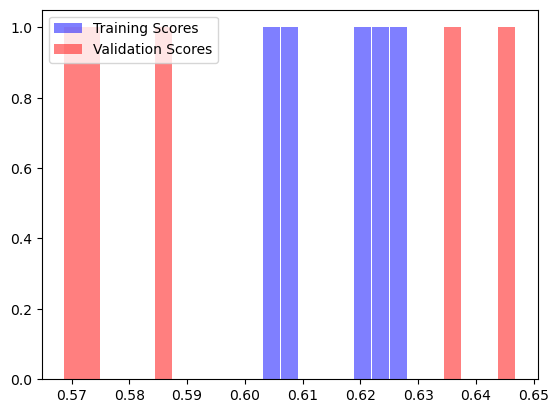

In [29]:
# Visualize R^2 of train and validation data via histogram

min_r2 = min(min(validation_scores), min(train_scores))
max_r2 = max(max(validation_scores), max(train_scores))

#max_r2 = 0.65

n_bins = 25
my_bins = np.linspace(min_r2, max_r2, n_bins+1)

#Two histograms: one for R^2 of training data, one for R^2 of validation data
plt.hist(train_scores, label='Training Scores', color='blue', bins=my_bins, alpha=0.5, rwidth=0.95)
plt.hist(validation_scores, label='Validation Scores', color='red', bins=my_bins, alpha=0.5, rwidth=0.95)
plt.legend()
plt.show()

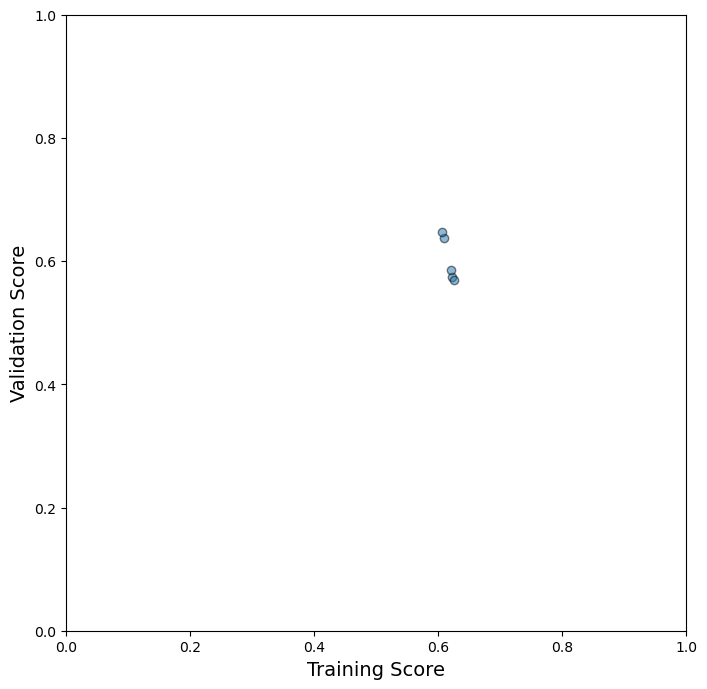

In [30]:
#Visualize R^2 of train and validation data via scatterplot

plt.figure(figsize=(8,8))
plt.scatter(train_scores, validation_scores, alpha=0.5, ec='k')
plt.xlabel('Training Score', fontsize=14)
plt.ylabel('Validation Score', fontsize=14)
plt.xlim([0,1])
plt.ylim([0,1])
#plt.ylim([min(validation_scores), 1])
plt.show()

### 4. The iris data example

In [31]:
# Load data from sklearn

from sklearn.datasets import load_iris
data = load_iris()

In [32]:
# Get data, put into dataframe

X = data.data
X_names = data.feature_names
X_df = pd.DataFrame(X, columns = X_names)
X_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
# Split into X and y

X = np.array(X_df.drop(columns = 'petal width (cm)'))
y = np.array(X_df['petal width (cm)'])

In [40]:
# Try a random train/test split

from sklearn.model_selection import train_test_split as tts
Xtrain,Xvalid,ytrain,yvalid = tts(X,y,test_size=0.4, shuffle=True, random_state = 146)
lin_reg.fit(Xtrain,ytrain)

print('Internal validity (R^2) :', format(lin_reg.score(Xtrain,ytrain), '.2f'))
print('External validity (R^2) :', format(lin_reg.score(Xvalid,yvalid), '.2f'))

Internal validity (R^2) : 0.94
External validity (R^2) : 0.94


In [41]:
# k-fold cross validation, same as the above

from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, random_state=146, shuffle=True)

train_scores = []
validation_scores = []

for idxTrain,idxValid in kf.split(X):
    #print(idxTrain)
    #print(idxValid)
    #break
    Xtrain = X[idxTrain,:]
    Xvalid = X[idxValid, :]
    ytrain = y[idxTrain]
    yvalid = y[idxValid]
    
    lin_reg.fit(Xtrain,ytrain)
    
    train_scores.append(lin_reg.score(Xtrain,ytrain))
    validation_scores.append(lin_reg.score(Xvalid,yvalid))

In [42]:
print('Average for train:', format(np.mean(train_scores),'.2f'))
print('Average for validation:', format(np.mean (validation_scores), '.2f'))

Average for train: 0.94
Average for validation: 0.94


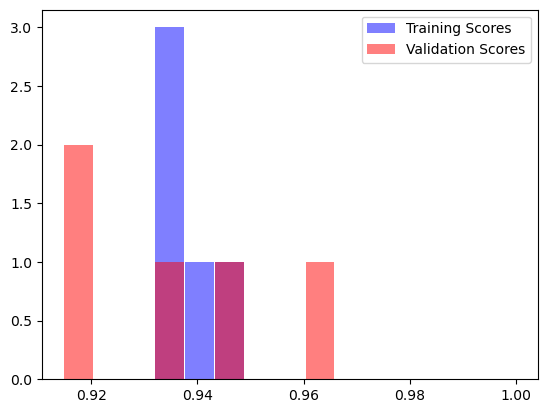

In [43]:
# Visualize as histogram

min_r2 = min(min(validation_scores), min(train_scores))
max_r2 = 1

n_bins = 15
my_bins = np.linspace(min_r2, max_r2, n_bins+1)

plt.hist(train_scores, label='Training Scores', color='blue', bins=my_bins, alpha=0.5, rwidth=0.95)
plt.hist(validation_scores, label='Validation Scores', color='red', bins=my_bins, alpha=0.5, rwidth=0.95)
plt.legend()
plt.show()

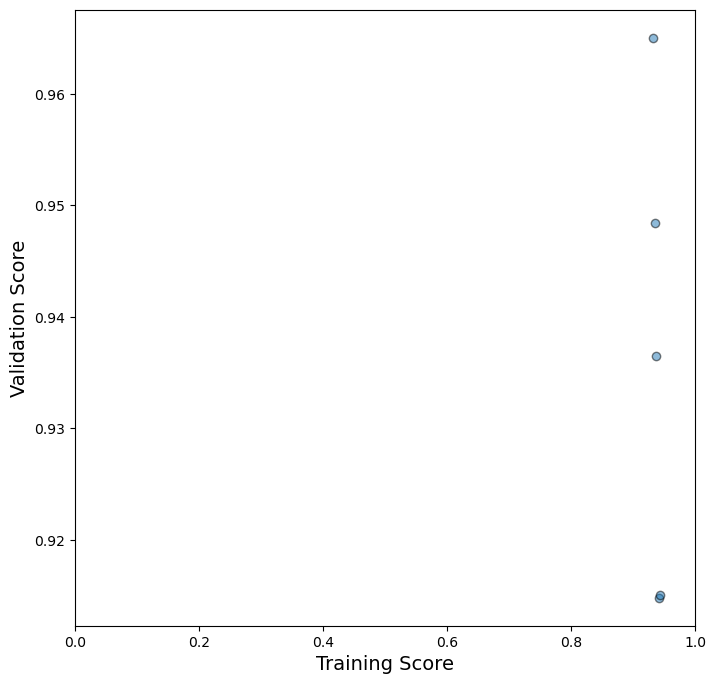

In [44]:
#Visualize as scatterplot 

plt.figure(figsize=(8,8))
plt.scatter(train_scores, validation_scores, alpha=0.5, ec='k')
plt.xlabel('Training Score', fontsize=14)
plt.ylabel('Validation Score', fontsize=14)
plt.xlim([0,1])
#plt.ylim([min(validation_scores), 1])
plt.show()

In [ ]:
#DoKFold function